# Create a heat map for emotions x hr

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("hrEmo.csv")
print(df.head(10))

    PID  FearRatingAudio  ExpFearConvert  UniqueEvent  AvgHR  HRzScore  \
0  1310              2.0             2.5            1  80.59  0.116322   
1  1310              2.0             2.5            1  80.59  0.116322   
2  1310              2.0             2.5            1  80.59  0.116322   
3  1310              NaN             NaN            2  72.06 -0.944132   
4  1310              NaN             NaN            2  72.06 -0.944132   
5  1310              NaN             NaN            2  72.06 -0.944132   
6  1310              2.0             2.5            3  81.13  0.183455   
7  1310              2.0             2.5            3  81.13  0.183455   
8  1310              2.0             2.5            3  81.13  0.183455   
9  1310              3.0             4.0            4  93.27  1.692706   

                                         Description           Emotions  \
0  all of us (participants) holding a rope as we ...  Amused/Interested   
1  all of us (participants) holding

In [14]:
data = pd.read_csv("heatmapData.csv")
data

,Index,Emotions,EmotionExtent,HRzScore
0,1,Fearful/Afraid*,1,0.219
1,2,Alert/Attentive,2,-0.072
2,3,Amused/Interested,2,0.057
3,4,Fearful/Afraid,2,0.535
4,5,Fearful/Afraid*,2,0.509
...,...,...,...,...
66,80,Overwhelmed,7,0.765
67,81,Panicked,7,0.675
68,82,Shocked/Surprised,7,0.464
69,83,Tense,7,0.758


In [15]:
data=pd.pivot_table(data, values = "HRzScore",index=["Emotions"], columns=["EmotionExtent"], aggfunc='mean')
data

EmotionExtent,1,2,3,4,5,6,7
Emotions,,,,,,,
Alert/Attentive,NaN,-0.072,NaN,0.517,0.344,0.446,0.607
Amused/Interested,NaN,0.057,0.261,0.447,0.475,0.287,0.322
Disgusted/Grossed Out,NaN,NaN,1.149,0.690,0.375,NaN,0.752
Excited/Enthused,NaN,NaN,0.047,0.620,0.382,0.589,0.269
Fearful/Afraid,NaN,0.535,0.543,0.660,0.669,0.712,0.932
Fearful/Afraid*,0.219,0.509,0.435,0.602,0.177,0.663,0.475
Hostile/Aggressive,NaN,NaN,1.053,NaN,NaN,0.992,NaN
Irritable/Annoyed,NaN,-0.678,0.114,0.474,0.558,0.991,0.918
Nervous/Jittery,NaN,1.262,0.772,0.586,0.552,0.705,0.780


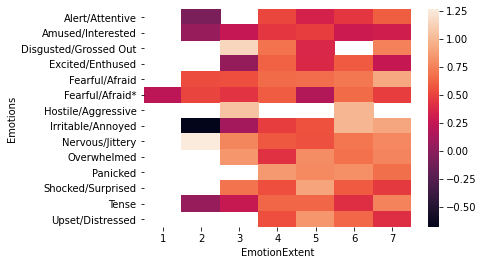

In [16]:
display=sns.heatmap(data)

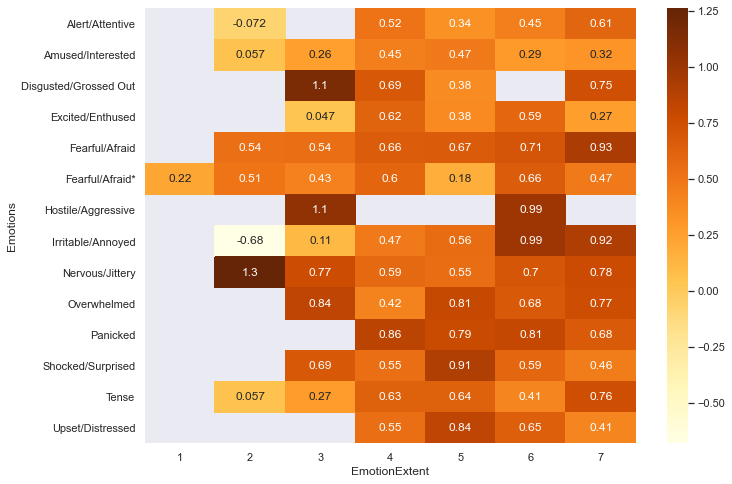

In [21]:
sns.set(rc={'figure.figsize':(11,8)})
display=sns.heatmap(data, annot=True, cmap="YlOrBr")